# Basic classification in TensorFlow/Keras

Based on:
https://www.tensorflow.org/tutorials/keras/basic_classification
and
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

## 0. Install TensorFlow and Keras

TensorFlow is an open source machine learning framework created by Google.
Keras is a high-level API to build and train models in TensorFlow used in this tutorial.

### 0.1. Install TensorFlow and Keras with Anaconda3:

pip install tensorflow
pip install keras

### 0.2. TensorFlow and Python3 compatibility issues

(As of November, 2018) Anaconda3 is supplied with Python 3.7, unfortunately Tensorflow is not ready yet for that, and TensorFlow installation would fail.
You should downgrade to Python 3.5 and then reinstall TensorFlow+Keras:

conda install python=3.5.0

pip install tensorflow
pip install keras

## 1. Prepare the workspace and obtain+preprocess MNIST data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 1.13.0-rc0
Keras version: 2.2.4-tf


MNIST dataset: 70,000 images of decimal digits (0..9) in format 28x28:
![image.png](attachment:image.png)

In [4]:
# Import MNIST dataset split into 60,000 for training and 10,000 for testing
dset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
type(dset)

module

In [6]:
train_images[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

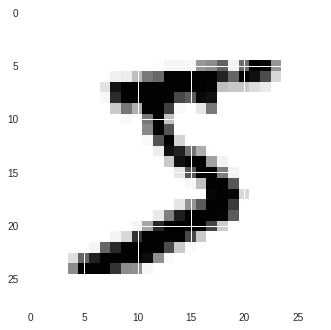

In [5]:
# Insight into imported data
num = 0
plt.imshow(train_images[num])

In [7]:
print(train_images[num])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
print(train_images[num].shape)

(28, 28)


In [9]:
print(train_labels[num])

5


In [11]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [0]:
# Categorize labels (not mandatory for our first simple network)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)

In [13]:
print(train_labels[num], train_labels_cat[num])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
print(test_labels[0], test_labels_cat[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [0]:
# Preprocess image data
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [16]:
print(train_images[num])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 2. Create, train and run model

### 2.1. Create simple model

In [17]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


### 2.2. Compile model

In [0]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### 2.3. Train model

In [20]:
model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0373 - acc: 0.9884
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0297 - acc: 0.9907
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0235 - acc: 0.9928
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0210 - acc: 0.9933
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0159 - acc: 0.9956
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0139 - acc: 0.9959
Epoch 7/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0117 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0110 - acc: 0.9962
Epoch 9/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0087 - acc: 0.9975
Epoch 10/10
60000/60000 [==============================] - 7s 110us/sampl

## 3. Test model

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0822 - acc: 0.9789


In [22]:
# Print accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9789


In [0]:
# Calculate prediction for test data
predictions = model.predict(test_images)

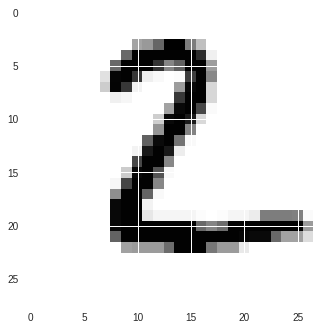

In [24]:
# Check what is predicted
num = 1
plt.imshow(test_images[num])

In [25]:
print(predictions[num])b

[9.0713070e-15 9.9548014e-09 1.0000000e+00 1.6807500e-10 1.6389442e-24
 3.6131278e-09 1.3046789e-15 7.1155329e-23 3.3858537e-12 5.4295734e-22]


In [26]:
print(np.argmax(predictions[num]))

2


## 4. Visualize results

### 4.1. Define auxiliary functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 4.2. Plot prediction

In [0]:
# class names just for visualization
class_names = ['0-zero', '1-one', '2-two', '3-three', '4-four', 
               '5-five', '6-six', '7-seven', '8-eight', '9-nine']

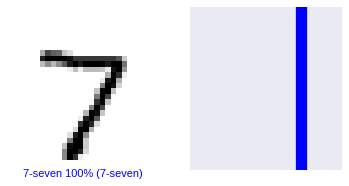

In [30]:
# visualization of prediction of one image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

### 4.3. More visualization

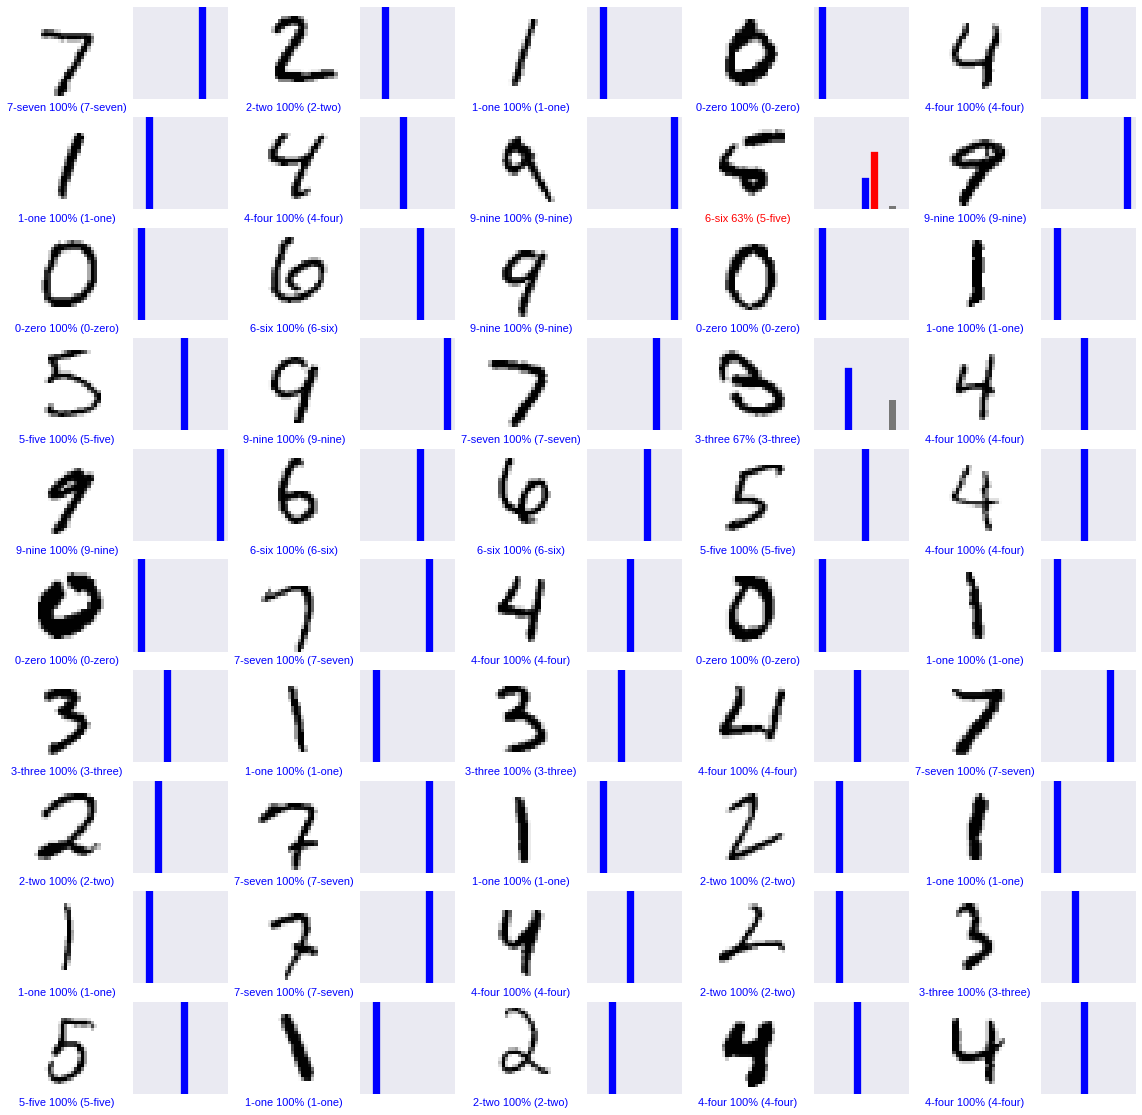

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## 5. Import, preprocess and train FASHION-MNIST

Fashion-MNIST is similar to MNIST but of clothings:
![image.png](attachment:image.png)

4423680/4422102 [==============================] - 0s 0us/step


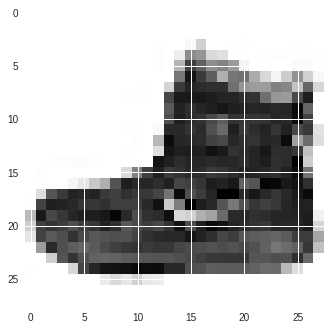

In [33]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
num = 0
plt.imshow(train_images[num])

In [44]:
len(train_images)

60000

In [0]:
# Preprocess data
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
test_images_orig = test_images
train_images = train_images / 255
test_images = test_images / 255

In [0]:
# Create and compile model
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [37]:
# Train model and obtain predictions
model.fit(train_images, train_labels_cat, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Epoch 1/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2799 - acc: 0.8963
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2669 - acc: 0.8995
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2567 - acc: 0.9039
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2461 - acc: 0.9081
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2376 - acc: 0.9109
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2305 - acc: 0.9133
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2233 - acc: 0.9160
Epoch 8/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2169 - acc: 0.9185
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2088 - acc: 0.9227
Epoch 10/10
10000/10000 [==============================] - 0s 40us/sample

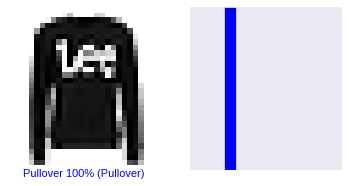

In [38]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

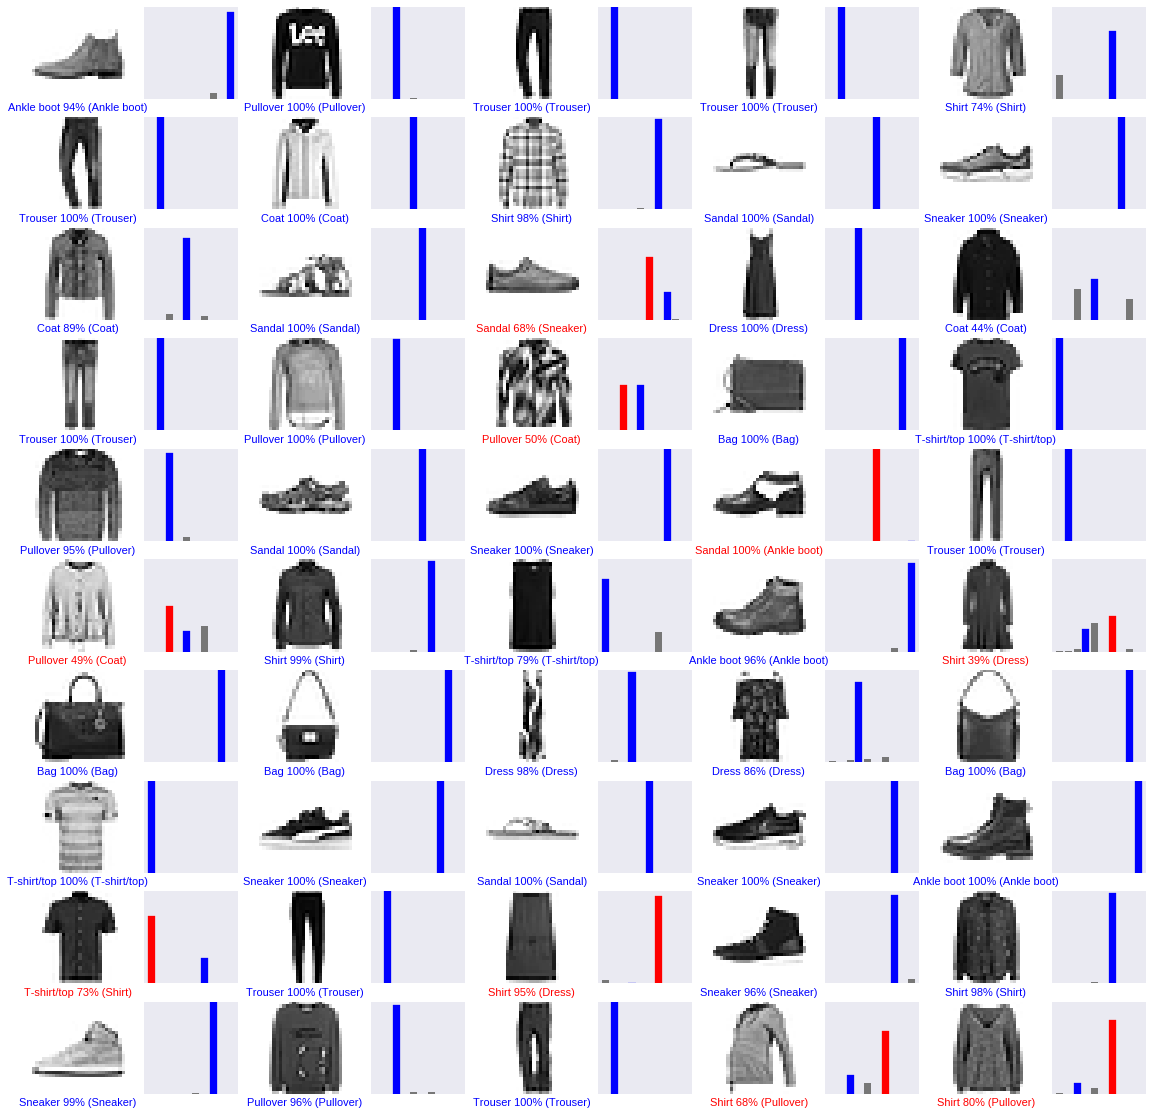

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

## 6. Convolutional neural network

Convolutional neural networks are better suited for image recognition

In [0]:
# Load data
dset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dset.load_data()
test_images_orig = test_images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels_cat = np_utils.to_categorical(train_labels, 10)
test_labels_cat = np_utils.to_categorical(test_labels, 10)
train_images = train_images / 255
test_images = test_images / 255

In [42]:
# Create and train model, and obtain predictions
model = keras.Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.fit(train_images, train_labels_cat, 
              batch_size=32, epochs=1, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
10000/10000 [==============================] - 6s 573us/sample - loss: 0.3249 - acc: 0.8843
Test accuracy: 0.8843


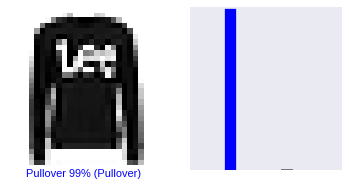

In [43]:
# Plot one prediction
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

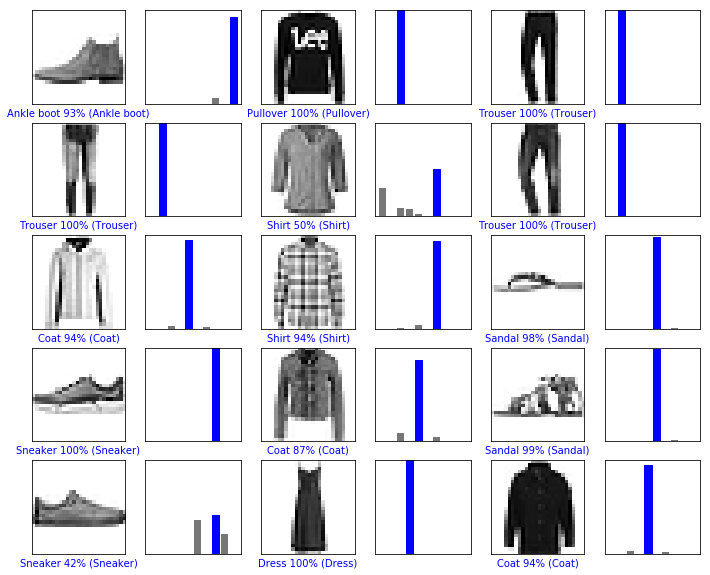

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)